In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("Stock_Price_Prediction.csv")
data.shape

(1259, 7)

In [4]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [5]:
data.head()

,date,open,high,low,close,volume,Name
0,08-02-2013,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,11-02-2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,12-02-2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,13-02-2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,14-02-2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [6]:
data.Name.value_counts()

AAPL    1259
Name: Name, dtype: int64

In [8]:
data.open.describe()

count    1259.000000
mean      109.055429
std        30.549220
min        55.424200
25%        84.647800
50%       108.970000
75%       127.335000
max       179.370000
Name: open, dtype: float64

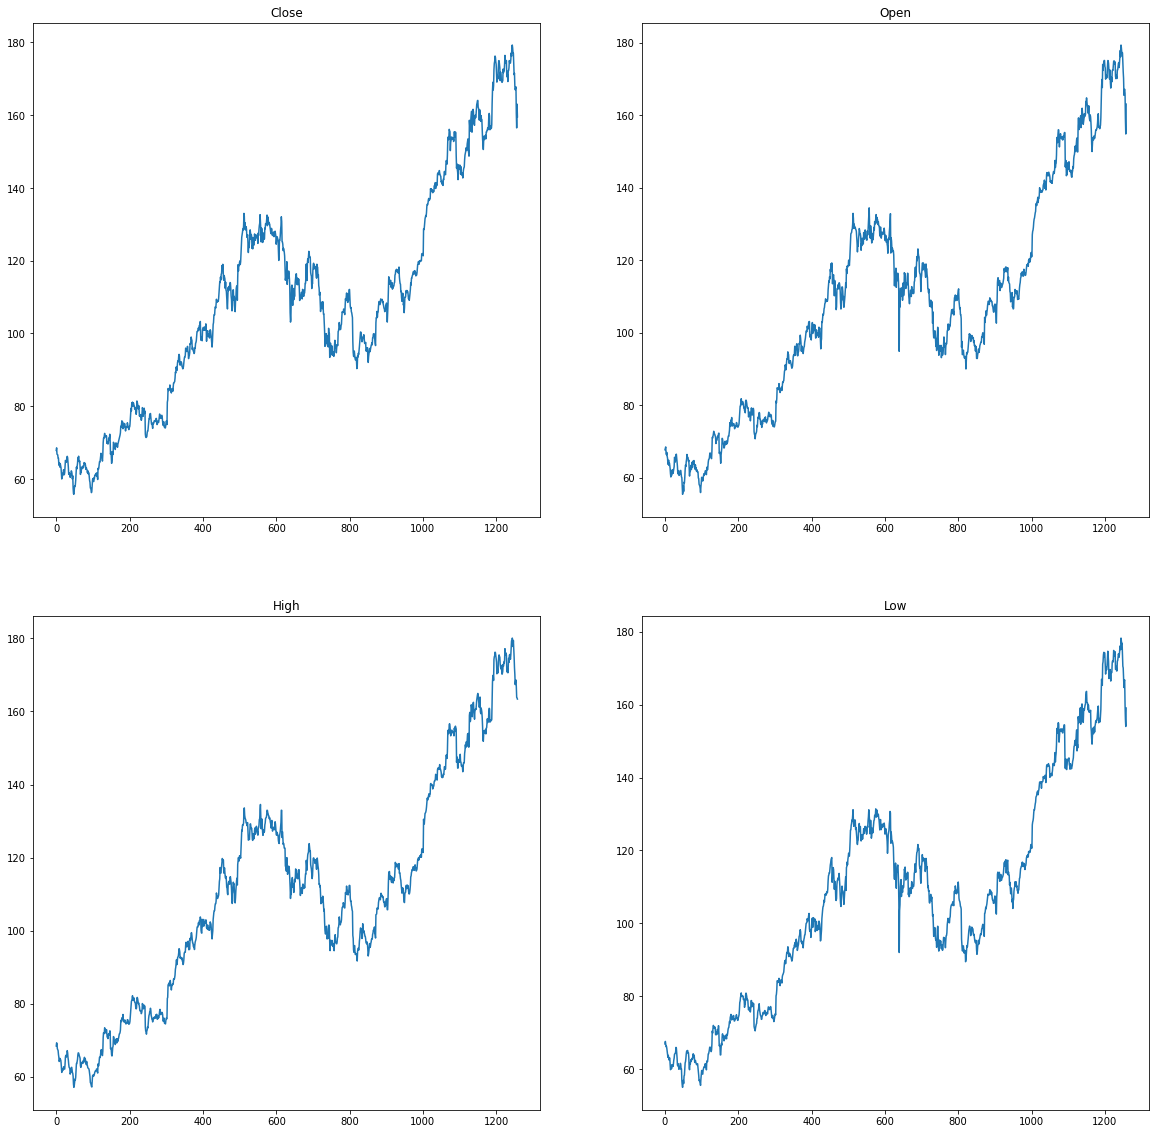

In [21]:
plt.rcParams['figure.figsize'] = (20,20)

plt.subplot(2,2,1)
plt.plot(data.close)
plt.title("Close")

plt.subplot(2,2,2)
plt.plot(data.open)
plt.title("Open")

plt.subplot(2,2,3)
plt.plot(data.high)
plt.title("High")

plt.subplot(2,2,4)
plt.plot(data.low)
plt.title("Low")
plt.show()

In [23]:
X_close = data.close.values.reshape(-1,1)
X_close.shape

(1259, 1)

In [24]:
scaler = MinMaxScaler()
X_close = scaler.fit_transform(X_close)

In [27]:
length = int(X_close.shape[0]*0.8)
X_close_train = X_close[0:length,:]
X_close_test = X_close[length:,:]
print(X_close_train.shape)
print(X_close_test.shape)

(1007, 1)
(252, 1)


In [28]:
def create_dataset(dataset, timestep):
  X = []
  Y = []
  for i in range(len(dataset)-timestep-1):
    a = dataset[i:i+timestep,0]
    X.append(a)
    Y.append(dataset[i+timestep,0])
  return np.array(X), np.array(Y)

In [30]:
xtrain, ytrain = create_dataset(X_close_train, 50)
xtest, ytest = create_dataset(X_close_test, 50)

In [32]:
ytest.shape

(201,)

In [35]:
xtrain = np.reshape(xtrain,(xtrain.shape[0], xtrain.shape[1],1))
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [38]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])
model.fit(xtrain,ytrain, batch_size=32, epochs=100)

Epoch 1/100
30/30 [==============================] - 5s 72ms/step - loss: 7.8852e-04 - accuracy: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 2s 71ms/step - loss: 6.6519e-04 - accuracy: 0.0000e+00
Epoch 3/100
30/30 [==============================] - 2s 71ms/step - loss: 6.6690e-04 - accuracy: 0.0000e+00
Epoch 4/100
30/30 [==============================] - 2s 71ms/step - loss: 7.5760e-04 - accuracy: 0.0000e+00
Epoch 5/100
30/30 [==============================] - 2s 71ms/step - loss: 6.3624e-04 - accuracy: 0.0000e+00
Epoch 6/100
30/30 [==============================] - 2s 71ms/step - loss: 6.8156e-04 - accuracy: 0.0000e+00
Epoch 7/100
30/30 [==============================] - 2s 70ms/step - loss: 6.5768e-04 - accuracy: 0.0000e+00
Epoch 8/100
30/30 [==============================] - 2s 71ms/step - loss: 6.0671e-04 - accuracy: 0.0000e+00
Epoch 9/100
30/30 [==============================] - 2s 71ms/step - loss: 6.2944e-04 - accuracy: 0.0000e+00
Epoch 10/100
30/30 [========

In [43]:
ypreds= model.predict(xtest)
ypreds = scaler.inverse_transform(ypreds)

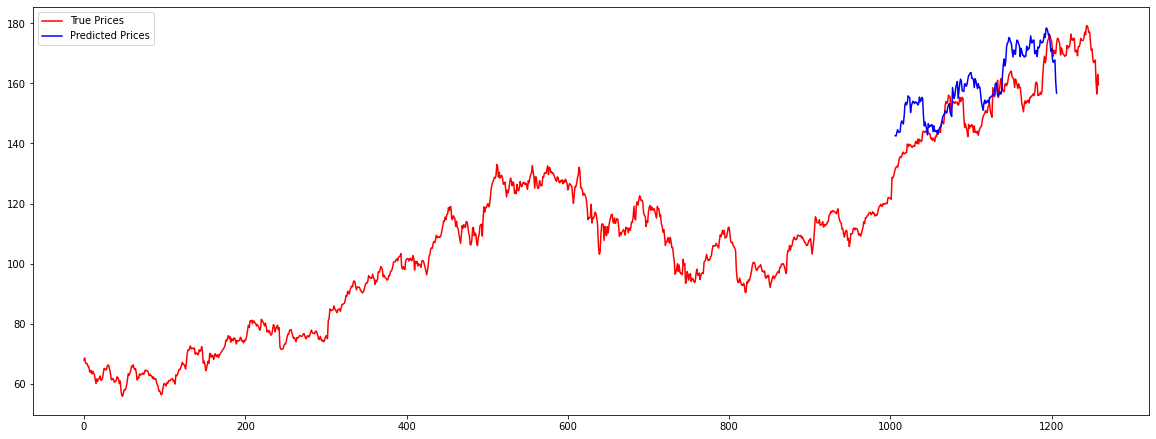

In [48]:
fig, ax = plt.subplots(figsize=(20,7.5))
plt.plot(data.close, color='red', label="True Prices")
ax.plot(range(len(ytrain) + 50, len(ytrain)+50+len(ypreds)), ypreds, color='blue', label="Predicted Prices")
plt.legend()

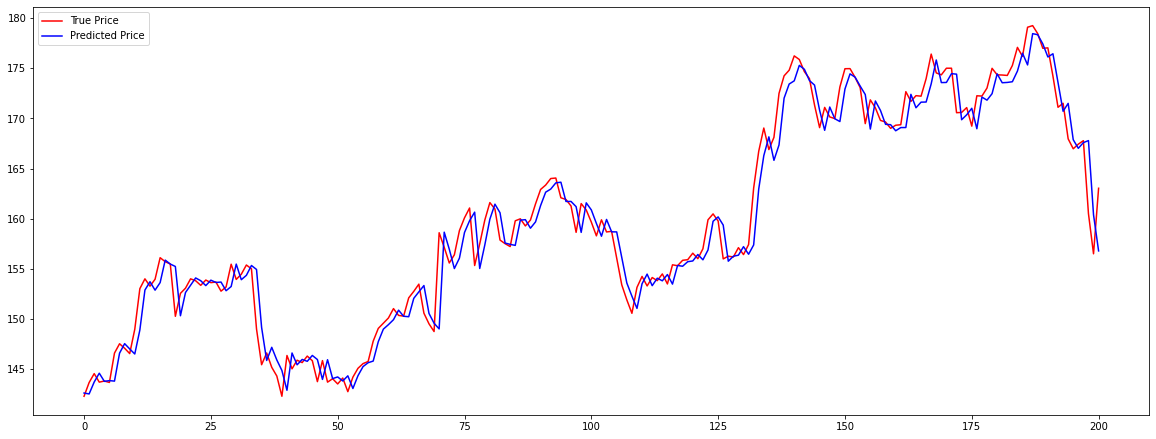

In [50]:
ytest_scaled = scaler.inverse_transform(ytest.reshape(-1,1))
fig,ax = plt.subplots(figsize=(20,7.5))
ax.plot(ytest_scaled, color='red', label='True Price')
plt.plot(ypreds, color = 'blue', label= 'Predicted Price')
plt.legend()

In [51]:
xtest[-1]

array([[0.96517375],
       [0.96525475],
       [0.95812751],
       [0.9498664 ],
       [0.92079054],
       [0.93998547],
       [0.93350617],
       [0.92338226],
       [0.9220864 ],
       [0.91698395],
       [0.91949468],
       [0.91989964],
       [0.94662675],
       [0.9387706 ],
       [0.9433871 ],
       [0.94298215],
       [0.95715562],
       [0.97699848],
       [0.96177212],
       [0.96023329],
       [0.96557871],
       [0.96557871],
       [0.92961859],
       [0.92986156],
       [0.93374914],
       [0.91876576],
       [0.94330611],
       [0.94306314],
       [0.94954244],
       [0.96549772],
       [0.96023329],
       [0.9600713 ],
       [0.95974734],
       [0.96776548],
       [0.98242489],
       [0.97513568],
       [0.99870414],
       [1.        ],
       [0.9935207 ],
       [0.98169597],
       [0.98201994],
       [0.9591804 ],
       [0.93399212],
       [0.93723177],
       [0.90847987],
       [0.90046173],
       [0.90418733],
       [0.907